In [47]:
import pandas as pd 
import pymysql
import seaborn as sns
import numpy as np

In [223]:
_host = "13.233.13.169"
_db = "flexiloans_aws_prod_db"
_user= "ds_cron_service"
_password="w76kFYZugHxx96Qk"
con = pymysql.connect(host = _host, db = _db, user = _user, passwd = _password)
cursor=con.cursor()
cursor.execute("SET SESSION sql_mode='';")


df1 = pd.read_sql(""" select 
la.code,la.amount,lad.gender,lbd.has_gst_registration,lad.address_pincode,Year(la.inserted_on)-Year(lad.dob) as AGE,lad.cibil_score,
lbd.address_pin_code,lbd.address_ownership_status,lad.address_ownership_status,lbd.business_vintage,lbd.legal_status,la.inserted_on,ltsr.LAST_IP_COMPLETED_ANALYSIS_PENDING_DATE,
case when ltsr.LAST_IP_COMPLETED_ANALYSIS_PENDING_DATE is null then 0 else 1 end as hot_lead,DATEDIFF( ltsr.LAST_IP_COMPLETED_ANALYSIS_PENDING_DATE,la.inserted_on) as HL_TF,b.total_call,
b.Connect_CALL,la.inserted_on,c.First_Connect,datediff(c.First_Connect,la.inserted_on) as First_Contact
from loan_application la,loan_applicant_detail lad,loan_business_detail lbd,loan_finance_detail lfd,loan_tat_status_report ltsr , partner p ,
(select loan_code,count(loan_code) as total_call ,sum(case when call_connection_status = 'CONTACTED'  then 1 else 0 end) as Connect_CALL  from click_to_call 
group by 1 
) b
,(select loan_code, min(call_start_time)as First_Connect from click_to_call where call_connection_status = 'Contacted'
group by 1 ) c 
where la.code=lad.loan_code and lbd.loan_code=la.code and lfd.loan_code=la.code and ltsr.loan_request_code=la.code and la.inserted_on >= "2019-10-01" and la.inserted_on <="2019-12-31" 
and la.source_of_lead in ('direct','campaign') and p.code=la.partner_code and b.loan_code=la.code and c.loan_code=la.code
and p.name in ('Other','None')  and la.auto_rejected=0 


""", con=con)

# call_tab = pd.read_sql(""" select la.code,la.inserted_on,cc.call_start_time,hour(timediff(cc.call_start_time,la.inserted_on)) as time_diff
# from loan_application la left join click_to_call cc ON cc.loan_code=la.code 
# where la.code in ('5e0b9a4221v8f','5e29803bg7wzb','5e297edbu4e1h',
# '5e297eeb1myor',
# '5e297f411getu','5e297cefbonwx',
# '5e297cfchp0ck',
# '5e297d0ciakok')""", con=con)





cursor.close()
con.close()



In [131]:
df1.shape

(36644, 18)

In [153]:
df1.isnull().sum()/df1.shape[0]*100

code                                        0.000000
amount                                      0.000000
gender                                     10.612924
has_gst_registration                       13.178146
address_pincode                            11.199651
AGE                                        10.640214
cibil_score                                86.510752
address_pin_code                           25.734090
address_ownership_status                   25.515773
address_ownership_status                   25.010916
business_vintage                           27.723502
legal_status                               18.611505
inserted_on                                 0.000000
LAST_IP_COMPLETED_ANALYSIS_PENDING_DATE    94.247353
hot_lead                                    0.000000
HL_TF                                      94.247353
total_call                                  0.000000
Connect_CALL                                0.000000
CIBIL_BUCKET                                0.

In [97]:
hl=df1[df1['hot_lead']==1]

In [154]:
hl.isnull().sum()/hl.shape[0]*100

code                                        0.000000
amount                                      0.000000
gender                                      0.045351
has_gst_registration                       10.839002
address_pincode                             0.045351
AGE                                         0.045351
cibil_score                                 0.000000
address_pin_code                            0.136054
address_ownership_status                    0.317460
address_ownership_status                    0.136054
business_vintage                            7.981859
legal_status                                0.090703
inserted_on                                 0.000000
LAST_IP_COMPLETED_ANALYSIS_PENDING_DATE     0.000000
hot_lead                                    0.000000
HL_TF                                       0.000000
dtype: float64

In [40]:
hl

,code,amount,gender,has_gst_registration,address_pincode,AGE,address_pin_code,address_ownership_status,address_ownership_status,business_vintage,legal_status,inserted_on,LAST_IP_COMPLETED_ANALYSIS_PENDING_DATE,hot_lead,HL_TF
0,5d932a5d12f1f,1000000.0,Male,None,751025,45.0,751010,Owned,Owned,None,Proprietorship,2019-10-01 15:58:45,2019-10-01 16:27:52,1,0.0
3,5dc15f638eca9,2000000.0,Male,None,201001,34.0,201009,Rented,Rented,None,Private Limited,2019-11-05 17:09:15,2019-11-06 12:34:29,1,1.0
6,5de63709e9c98,1000000.0,Male,None,641652,43.0,638459,Rented,Owned,None,Proprietorship,2019-12-03 15:50:57,2019-12-03 16:48:39,1,0.0
79,5d92afcfpxg0n,1000000.0,Male,None,383430,38.0,383430,Owned,Owned,More than 5 years,Proprietorship,2019-10-01 07:15:51,2019-11-19 17:40:08,1,49.0
80,5d92afe66ae8i,200000.0,Male,None,225411,47.0,224001,Owned,Owned,More than 5 years,Proprietorship,2019-10-01 07:16:14,2019-10-25 16:40:36,1,24.0
81,5d92afefusipp,700000.0,Male,None,110087,42.0,110087,Owned,Owned,More than 5 years,Proprietorship,2019-10-01 07:16:22,2019-11-19 13:03:11,1,49.0
83,5d92b00648xg5,2000000.0,Male,None,641001,26.0,641026,Owned,Owned,2 to 5 years,Proprietorship,2019-10-01 07:16:45,2019-11-19 15:33:16,1,49.0
85,5d92b00clbc94,1000000.0,Male,None,141401,38.0,141401,Owned,Owned,1 to 2 years,Partnership,2019-10-01 07:16:51,2019-10-22 19:52:10,1,21.0
90,5d92b052brfo5,1000000.0,Male,None,230001,26.0,230001,Rented,Rented,2 to 5 years,Proprietorship,2019-10-01 07:18:01,2019-10-23 18:37:20,1,22.0
93,5d92b065ojkog,1000000.0,Male,None,600078,26.0,600061,Rented,Owned,2 to 5 years,Proprietorship,2019-10-01 07:18:21,2019-10-16 19:03:51,1,15.0


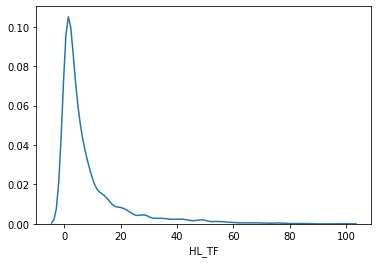

In [50]:
sns.distplot(hl['HL_TF'],hist=False)

TypeError: can only concatenate str (not "NoneType") to str

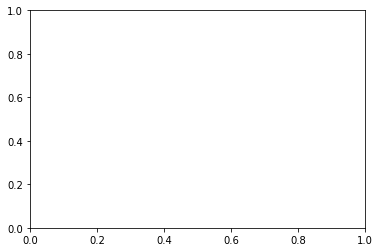

In [106]:
sns.distplot(hl['cibil_score'],hist=False)

In [90]:
hl_tf_dis=pd.pivot_table(hl,index='HL_TF',values='code',aggfunc='count')

In [91]:
hl_tf_dis['percentage']=hl_tf_dis['code']/hl.shape[0]*100

In [94]:
11.46+17.35+10.91+7.52

47.239999999999995

In [92]:
hl_tf_dis

,code,percentage
HL_TF,,
0.0,253,11.463525
1.0,383,17.353874
2.0,241,10.919801
3.0,166,7.521522
4.0,142,6.434073
5.0,113,5.120072
6.0,110,4.984141
7.0,89,4.032623
8.0,67,3.035795


In [64]:
sns.jointplot(x=np.log('amount'), y="HL_TF", data=hl)

TypeError: ufunc 'log' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [71]:
amount=list(hl['amount'])

In [73]:
amount=np.log(amount)

In [77]:
len(amount)

2207

In [78]:
len(count_list)

80

In [86]:
count_list=list((hl['HL_TF']))

In [87]:
np.corrcoef(amount,count_list)

array([[1.        , 0.00581624],
       [0.00581624, 1.        ]])

In [88]:
hl.corr(method='pearson')

,amount,AGE,hot_lead,HL_TF
amount,1.000000,0.149881,NaN,0.001564
AGE,0.149881,1.000000,NaN,0.004226
hot_lead,NaN,NaN,NaN,NaN
HL_TF,0.001564,0.004226,NaN,1.000000


,code,amount,gender,has_gst_registration,address_pincode,AGE,address_pin_code,address_ownership_status,address_ownership_status,business_vintage,legal_status,inserted_on,LAST_IP_COMPLETED_ANALYSIS_PENDING_DATE,hot_lead,HL_TF
0,5d932a5d12f1f,1000000.0,Male,None,751025,45.0,751010,Owned,Owned,None,Proprietorship,2019-10-01 15:58:45,2019-10-01 16:27:52,1,0.0
3,5dc15f638eca9,2000000.0,Male,None,201001,34.0,201009,Rented,Rented,None,Private Limited,2019-11-05 17:09:15,2019-11-06 12:34:29,1,1.0
6,5de63709e9c98,1000000.0,Male,None,641652,43.0,638459,Rented,Owned,None,Proprietorship,2019-12-03 15:50:57,2019-12-03 16:48:39,1,0.0
79,5d92afcfpxg0n,1000000.0,Male,None,383430,38.0,383430,Owned,Owned,More than 5 years,Proprietorship,2019-10-01 07:15:51,2019-11-19 17:40:08,1,49.0
80,5d92afe66ae8i,200000.0,Male,None,225411,47.0,224001,Owned,Owned,More than 5 years,Proprietorship,2019-10-01 07:16:14,2019-10-25 16:40:36,1,24.0
81,5d92afefusipp,700000.0,Male,None,110087,42.0,110087,Owned,Owned,More than 5 years,Proprietorship,2019-10-01 07:16:22,2019-11-19 13:03:11,1,49.0
83,5d92b00648xg5,2000000.0,Male,None,641001,26.0,641026,Owned,Owned,2 to 5 years,Proprietorship,2019-10-01 07:16:45,2019-11-19 15:33:16,1,49.0
85,5d92b00clbc94,1000000.0,Male,None,141401,38.0,141401,Owned,Owned,1 to 2 years,Partnership,2019-10-01 07:16:51,2019-10-22 19:52:10,1,21.0
90,5d92b052brfo5,1000000.0,Male,None,230001,26.0,230001,Rented,Rented,2 to 5 years,Proprietorship,2019-10-01 07:18:01,2019-10-23 18:37:20,1,22.0
93,5d92b065ojkog,1000000.0,Male,None,600078,26.0,600061,Rented,Owned,2 to 5 years,Proprietorship,2019-10-01 07:18:21,2019-10-16 19:03:51,1,15.0


In [105]:
hl['cibil_score'].fillna(0,inplace=True)

//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [113]:
hl=hl[hl['cibil_score'].notnull()]

ValueError: operands could not be broadcast together with shapes (2205,) (2207,) 

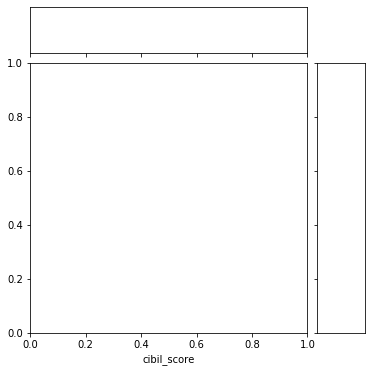

In [126]:
sns.jointplot(y=amount,x=c_score)

In [122]:
c_score=hl['cibil_score']

In [125]:

type(c_score)

pandas.core.series.Series

In [133]:
df1.to_csv("/Users/fllap0254/Desktop/CPHL/DATA1.csv")

In [147]:
def cibil_bucket(x):
    try:
        x=int(x)
        if x < 0:
            return -1
        elif x >=0 and x<=500:
            return "0-500"
        elif x >500 and x<=550:
            return "500-550"
        elif x >550 and x<=600:
            return "550-600"
        elif x >600 and x<=650:
            return "600-650"
        elif x >650 and x<=700:
            return "650-700"
        elif x >700 and x<=750:
            return "700-750"
        elif x >750 and x<=800:
            return "750-800"
        elif x >800 and x<=850:
            return "800-850"
        elif x > 850:
            return "850+"
        else:
            return "Cib_not_found"

    except:
        return "Cib_not_found"






In [148]:
df1['CIBIL_BUCKET']=df1['cibil_score'].apply(cibil_bucket)

In [152]:
pd.pivot_table(df1,index='CIBIL_BUCKET',values='hot_lead',aggfunc=np.sum)

,hot_lead
CIBIL_BUCKET,
-1,1
0-500,43
500-550,4
550-600,85
600-650,270
650-700,747
700-750,713
750-800,135
800-850,19


In [156]:
call_tab

,code,inserted_on,call_start_time,time_diff
0,5e0b9a4221v8f,2020-01-01 00:28:09,2020-01-02 12:48:58,36.0
1,5e0b9a4221v8f,2020-01-01 00:28:09,2020-01-03 10:51:28,58.0
2,5e0b9a4221v8f,2020-01-01 00:28:09,2020-01-03 11:22:04,58.0
3,5e0b9a4221v8f,2020-01-01 00:28:09,2020-01-03 12:37:13,60.0
4,5e297cefbonwx,2020-01-23 16:31:03,2020-01-24 10:59:41,18.0
5,5e297cfchp0ck,2020-01-23 16:31:15,NaT,NaN
6,5e297d0ciakok,2020-01-23 16:31:32,NaT,NaN
7,5e297edbu4e1h,2020-01-23 16:39:14,NaT,NaN
8,5e297eeb1myor,2020-01-23 16:39:31,NaT,NaN
9,5e297f411getu,2020-01-23 16:40:57,NaT,NaN


In [158]:
call_tab.time_diff.diff()

0      NaN
1     22.0
2      0.0
3      2.0
4    -42.0
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11    18.0
Name: time_diff, dtype: float64

In [ ]:
def call_diff(i):
    if i==df['code'][]
    print()

In [161]:
call_tab['code']

0     5e0b9a4221v8f
1     5e0b9a4221v8f
2     5e0b9a4221v8f
3     5e0b9a4221v8f
4     5e297cefbonwx
5     5e297cfchp0ck
6     5e297d0ciakok
7     5e297edbu4e1h
8     5e297eeb1myor
9     5e297f411getu
10    5e29803bg7wzb
11    5e29803bg7wzb
Name: code, dtype: object

In [179]:
t=call_tab.groupby(by=['code'])

In [180]:
t.first()

,inserted_on,call_start_time,time_diff
code,,,
5e0b9a4221v8f,2020-01-01 00:28:09,2020-01-02 12:48:58,36.0
5e297cefbonwx,2020-01-23 16:31:03,2020-01-24 10:59:41,18.0
5e297cfchp0ck,2020-01-23 16:31:15,NaT,NaN
5e297d0ciakok,2020-01-23 16:31:32,NaT,NaN
5e297edbu4e1h,2020-01-23 16:39:14,NaT,NaN
5e297eeb1myor,2020-01-23 16:39:31,NaT,NaN
5e297f411getu,2020-01-23 16:40:57,NaT,NaN
5e29803bg7wzb,2020-01-23 16:45:07,2020-01-23 18:21:58,1.0


In [181]:
t.get_group('5e0b9a4221v8f')

,inserted_on,call_start_time,time_diff
0,2020-01-01 00:28:09,2020-01-02 12:48:58,36.0
1,2020-01-01 00:28:09,2020-01-03 10:51:28,58.0
2,2020-01-01 00:28:09,2020-01-03 11:22:04,58.0
3,2020-01-01 00:28:09,2020-01-03 12:37:13,60.0


In [184]:
y=t.get_group('5e0b9a4221v8f')

In [188]:
y['time_diff'][0]

36.0

In [197]:
g=y.time_diff.diff()

In [200]:
g

0    36.0
1    22.0
2     0.0
3     2.0
Name: time_diff, dtype: float64

In [199]:
g[0]=y['time_diff'][0]

In [203]:
def time_dis(i):
    y=t.get_group(i)
    g=y.time_diff.diff()
    g[0]=y['time_diff'][0]
    return g
   

In [206]:
df1

,code,amount,gender,has_gst_registration,address_pincode,AGE,cibil_score,address_pin_code,address_ownership_status,address_ownership_status,business_vintage,legal_status,inserted_on,LAST_IP_COMPLETED_ANALYSIS_PENDING_DATE,hot_lead,HL_TF,total_call,Connect_CALL
0,5d932a5d12f1f,1000000.0,Male,None,751025,45.0,00725,751010,Owned,Owned,None,Proprietorship,2019-10-01 15:58:45,2019-10-01 16:27:52,1,0.0,1,0.0
1,5dada93ax1nsi,100000.0,Male,None,522005,29.0,None,,,None,None,Proprietorship,2019-10-21 18:18:57,NaT,0,NaN,6,4.0
2,5dc6c586tdg9g,500000.0,Female,None,416002,30.0,None,,,None,None,Proprietorship,2019-11-09 19:26:21,NaT,0,NaN,11,2.0
3,5dd54150aabb6,1000000.0,Male,None,413517,27.0,None,413517,owned,Owned,None,Proprietorship,2019-11-20 19:06:16,NaT,0,NaN,1,1.0
4,5de63709e9c98,1000000.0,Male,None,641652,43.0,00703,638459,Rented,Owned,None,Proprietorship,2019-12-03 15:50:57,2019-12-03 16:48:39,1,0.0,5,1.0
5,5d924c818awdc,1000000.0,Male,b'\x01',360311,23.0,None,360311,Owned,Owned,More than 5 years,Partnership,2019-10-01 00:12:08,NaT,0,NaN,59,5.0
6,5d924f20o42zo,500000.0,Male,b'\x00',396310,38.0,None,396310,Owned,Owned,More than 5 years,Proprietorship,2019-10-01 00:23:19,NaT,0,NaN,3,2.0
7,5d9250402zfv5,2000000.0,Male,b'\x01',382345,46.0,None,382345,Rented,Rented,More than 5 years,Proprietorship,2019-10-01 00:28:07,NaT,0,NaN,25,5.0
8,5d9250dffwoja,500000.0,Male,b'\x00',581111,24.0,None,581111,Owned,Owned,Less than 1 year,Partnership,2019-10-01 00:30:46,NaT,0,NaN,1,1.0
9,5d9250fcef9gv,700000.0,Male,b'\x01',390018,43.0,None,390001,Rented,Owned,2 to 5 years,Proprietorship,2019-10-01 00:31:15,NaT,0,NaN,7,4.0


In [212]:
hl=df1[df1['hot_lead']==1]

,code,amount,gender,has_gst_registration,address_pincode,AGE,cibil_score,address_pin_code,address_ownership_status,address_ownership_status,...,legal_status,inserted_on,LAST_IP_COMPLETED_ANALYSIS_PENDING_DATE,hot_lead,HL_TF,total_call,Connect_CALL,inserted_on,First_Connect,First_Contact
3,5de63709e9c98,1000000.0,Male,None,641652,43.0,00703,638459,Rented,Owned,...,Proprietorship,2019-12-03 15:50:57,2019-12-03 16:48:39,1,0.0,5,1.0,2019-12-03 15:50:57,2019-12-06 13:14:56,3
24,5d92afcfpxg0n,1000000.0,Male,None,383430,38.0,00694,383430,Owned,Owned,...,Proprietorship,2019-10-01 07:15:51,2019-11-19 17:40:08,1,49.0,12,3.0,2019-10-01 07:15:51,2019-10-22 16:13:50,21
25,5d92afe66ae8i,200000.0,Male,None,225411,47.0,00648,224001,Owned,Owned,...,Proprietorship,2019-10-01 07:16:14,2019-10-25 16:40:36,1,24.0,3,1.0,2019-10-01 07:16:14,2019-10-22 16:15:53,21
26,5d92afefusipp,700000.0,Male,None,110087,42.0,00610,110087,Owned,Owned,...,Proprietorship,2019-10-01 07:16:22,2019-11-19 13:03:11,1,49.0,13,3.0,2019-10-01 07:16:22,2019-11-04 10:54:52,34
27,5d92b00648xg5,2000000.0,Male,None,641001,26.0,00694,641026,Owned,Owned,...,Proprietorship,2019-10-01 07:16:45,2019-11-19 15:33:16,1,49.0,10,3.0,2019-10-01 07:16:45,2019-10-16 14:43:48,15
28,5d92b00clbc94,1000000.0,Male,None,141401,38.0,00735,141401,Owned,Owned,...,Partnership,2019-10-01 07:16:51,2019-10-22 19:52:10,1,21.0,2,1.0,2019-10-01 07:16:51,2019-10-22 16:24:24,21
29,5d92b052brfo5,1000000.0,Male,None,230001,26.0,00705,230001,Rented,Rented,...,Proprietorship,2019-10-01 07:18:01,2019-10-23 18:37:20,1,22.0,2,2.0,2019-10-01 07:18:01,2019-10-16 12:21:22,15
31,5d92b065ojkog,1000000.0,Male,None,600078,26.0,00677,600061,Rented,Owned,...,Proprietorship,2019-10-01 07:18:21,2019-10-16 19:03:51,1,15.0,2,1.0,2019-10-01 07:18:21,2019-10-16 18:21:25,15
33,5d92b08fc5n96,500000.0,Male,None,313324,26.0,00604,313324,Rented,Owned,...,Partnership,2019-10-01 07:19:02,2019-11-13 14:55:17,1,43.0,10,3.0,2019-10-01 07:19:02,2019-10-16 13:24:54,15
34,5d92b0c3e3qvd,400000.0,Male,None,395010,37.0,00670,395010,Rented,Owned,...,Proprietorship,2019-10-01 07:19:55,2019-11-19 18:47:45,1,49.0,12,3.0,2019-10-01 07:19:55,2019-10-24 11:24:56,23


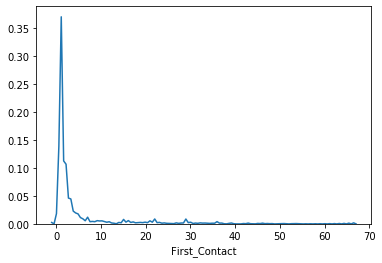

In [214]:
sns.distplot(hl['First_Contact'],hist=False)

In [215]:
o=list(hl['First_Contact'])

def CountFrequency(my_list): 
      
    # Creating an empty dictionary  
    freq = {} 
    for items in my_list: 
        freq[items] = my_list.count(items) 
      
    for key, value in freq.items(): 
        print ("% d : % d"%(key, value)) 
        
        

CountFrequency(o)       

In [216]:
o=list(hl['First_Contact'])

In [218]:
CountFrequency(o)

 3 :  87
 21 :  8
 34 :  2
 15 :  11
 23 :  4
 29 :  12
 32 :  3
 16 :  9
 37 :  2
 24 :  3
 22 :  12
 36 :  6
 48 :  1
 30 :  4
 51 :  1
 17 :  6
 0 :  789
 10 :  11
 2 :  186
 1 :  594
 43 :  2
 28 :  2
 5 :  31
 27 :  3
 12 :  6
 4 :  41
 6 :  14
 20 :  5
 26 :  1
 46 :  2
 54 :  1
 19 :  5
 25 :  2
 31 :  2
 35 :  2
 42 :  1
 33 :  3
 7 :  17
 53 :  1
 9 :  10
 50 :  1
 45 :  1
 11 :  7
 14 :  3
 39 :  3
 8 :  7
 18 :  4
 13 :  1
 47 :  1
 66 :  1


,code,amount,gender,has_gst_registration,address_pincode,AGE,cibil_score,address_pin_code,address_ownership_status,address_ownership_status,...,legal_status,inserted_on,LAST_IP_COMPLETED_ANALYSIS_PENDING_DATE,hot_lead,HL_TF,total_call,Connect_CALL,inserted_on,First_Connect,First_Contact
0,5dada93ax1nsi,100000.0,Male,None,522005,29.0,None,,,None,...,Proprietorship,2019-10-21 18:18:57,NaT,0,NaN,6,4.0,2019-10-21 18:18:57,2019-10-22 10:15:44,1
1,5dc6c586tdg9g,500000.0,Female,None,416002,30.0,None,,,None,...,Proprietorship,2019-11-09 19:26:21,NaT,0,NaN,11,2.0,2019-11-09 19:26:21,2019-11-15 10:07:54,6
2,5dd54150aabb6,1000000.0,Male,None,413517,27.0,None,413517,owned,Owned,...,Proprietorship,2019-11-20 19:06:16,NaT,0,NaN,1,1.0,2019-11-20 19:06:16,2019-11-21 13:10:15,1
3,5de63709e9c98,1000000.0,Male,None,641652,43.0,00703,638459,Rented,Owned,...,Proprietorship,2019-12-03 15:50:57,2019-12-03 16:48:39,1,0.0,5,1.0,2019-12-03 15:50:57,2019-12-06 13:14:56,3
4,5d924c818awdc,1000000.0,Male,b'\x01',360311,23.0,None,360311,Owned,Owned,...,Partnership,2019-10-01 00:12:08,NaT,0,NaN,59,5.0,2019-10-01 00:12:08,2019-10-01 15:00:12,0
5,5d924f20o42zo,500000.0,Male,b'\x00',396310,38.0,None,396310,Owned,Owned,...,Proprietorship,2019-10-01 00:23:19,NaT,0,NaN,3,2.0,2019-10-01 00:23:19,2019-10-01 11:01:03,0
6,5d9250402zfv5,2000000.0,Male,b'\x01',382345,46.0,None,382345,Rented,Rented,...,Proprietorship,2019-10-01 00:28:07,NaT,0,NaN,25,5.0,2019-10-01 00:28:07,2019-10-04 15:33:17,3
7,5d9250dffwoja,500000.0,Male,b'\x00',581111,24.0,None,581111,Owned,Owned,...,Partnership,2019-10-01 00:30:46,NaT,0,NaN,1,1.0,2019-10-01 00:30:46,2019-10-01 10:01:08,0
8,5d9250fcef9gv,700000.0,Male,b'\x01',390018,43.0,None,390001,Rented,Owned,...,Proprietorship,2019-10-01 00:31:15,NaT,0,NaN,7,4.0,2019-10-01 00:31:15,2019-10-02 15:07:17,1
9,5d92510dqopz7,400000.0,Male,b'\x00',431001,28.0,None,431001,Owned,Rented,...,Proprietorship,2019-10-01 00:31:33,NaT,0,NaN,4,1.0,2019-10-01 00:31:33,2019-10-01 10:02:10,0
